# Loan Prediction

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [377]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [219]:
train_  = train.copy()
test_data_  = test_data.copy()

In [220]:
print(train.dtypes, "\n\ntrain.shape: ", train.shape, "\n\ntest.shape: ", test_data.shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object 

train.shape:  (614, 13) 

test.shape:  (367, 12)


In [221]:
dataset = pd.concat([train,test_data], axis = 0).reset_index(drop = True)
dataset = dataset.fillna(np.nan)
dataset.shape

(981, 13)

Catgorical, ordinal and Nominal Variables

### Categorical

In [222]:
train[train["Loan_Status"] == "Y"]["Gender"].value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

In [223]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
type_ = ["Y", "N"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=train['Loan_Status'].value_counts(), name="Loan_Status"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Loan approval status",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='loan_status', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

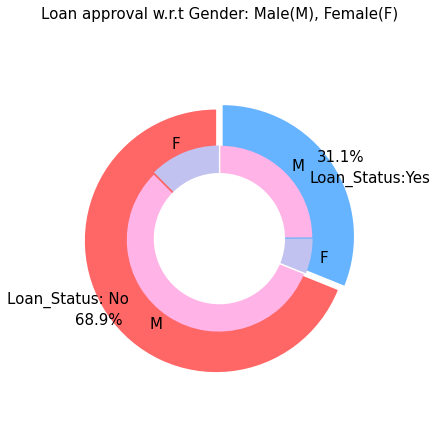

In [224]:
plt.figure(figsize=(6, 6))
labels =["Loan_Status: No","Loan_Status:Yes"]
values = [train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Female + train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Male,
          train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Female + train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Male]
labels_gender = ["F","M","F","M"]
sizes_gender = [train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Female,
                train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Male,
                train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Female,
                train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Male]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Loan approval w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

### Ordinal

In [225]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Dependents", color="Loan_Status", barmode="group", title="<b>Loan approval based on Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [226]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Loan_Status", color="Education", barmode="group", title="<b>Loan approval based on Education</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [227]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Loan_Status", color="Property_Area", barmode="group", title="<b>Loan approval based on property area</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [228]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Married", color="Loan_Status", barmode="group", title="<b>Loan approval based on Marital status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [229]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Self_Employed", color="Loan_Status", barmode="group", title="<b>Loan approval based on Self employment status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Numerical independent variable vs target variable

In [230]:
def kdeplot(param, x_title):
    
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(param[(train["Loan_Status"] == 'N') ],
                color="Red", shade = True);
    ax = sns.kdeplot(param[(train["Loan_Status"] == 'Y') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not approved","approved"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel(x_title);
    ax.set_title("Distribution of " + x_title +" by loan approval status");

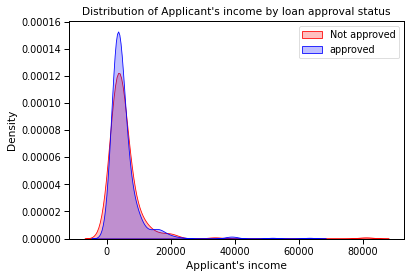

In [231]:
kdeplot(train.ApplicantIncome, "Applicant's income")

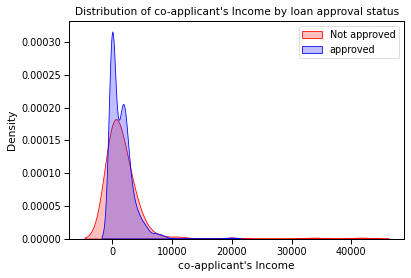

In [232]:
kdeplot(train.CoapplicantIncome, "co-applicant's Income")

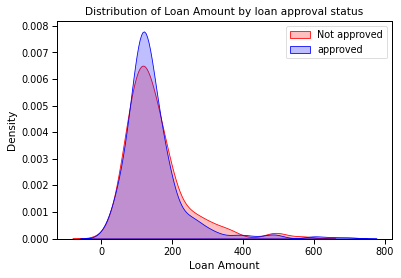

In [233]:
kdeplot(train.LoanAmount, "Loan Amount")

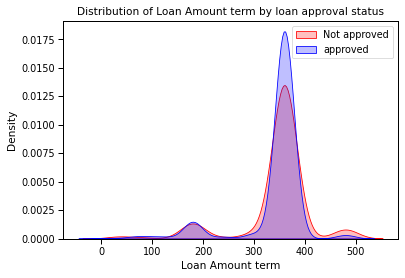

In [234]:
kdeplot(train.Loan_Amount_Term, "Loan Amount term")

In [235]:
train.ApplicantIncome.values.min()

150

Applicant's Income

In [236]:
train["ApplicantIncome_"] = list(map(lambda x: 'Low' if x <= 2500 
         else('Medium' if (x > 2500 and x <= 4000) 
              else('High' if (x > 4000 and x <= 6000) else 'Very High')), train.ApplicantIncome))

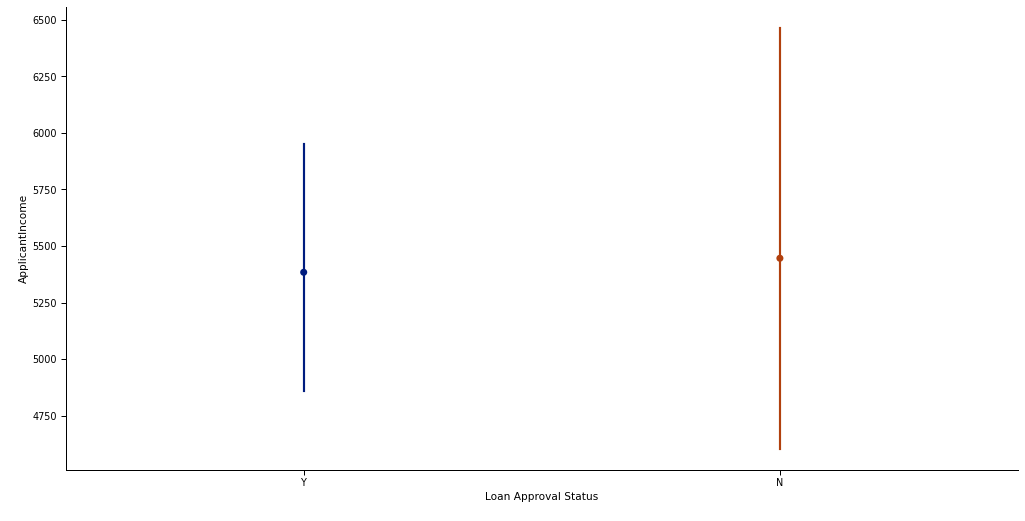

In [237]:
sns.factorplot(y ="ApplicantIncome", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\nApplicantIncome")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [238]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="ApplicantIncome_", color="Loan_Status", barmode="group", title="<b>Loan approval based on Applicant's Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Applicant's income does not affect the chances of Loan approval

In [239]:
train["CoapplicantIncome_"] = list(map(lambda x: 'Low' if x <= 1000 
                                   else('High' if (x > 1000 and x <= 3000) else 'Very High'), train.CoapplicantIncome))

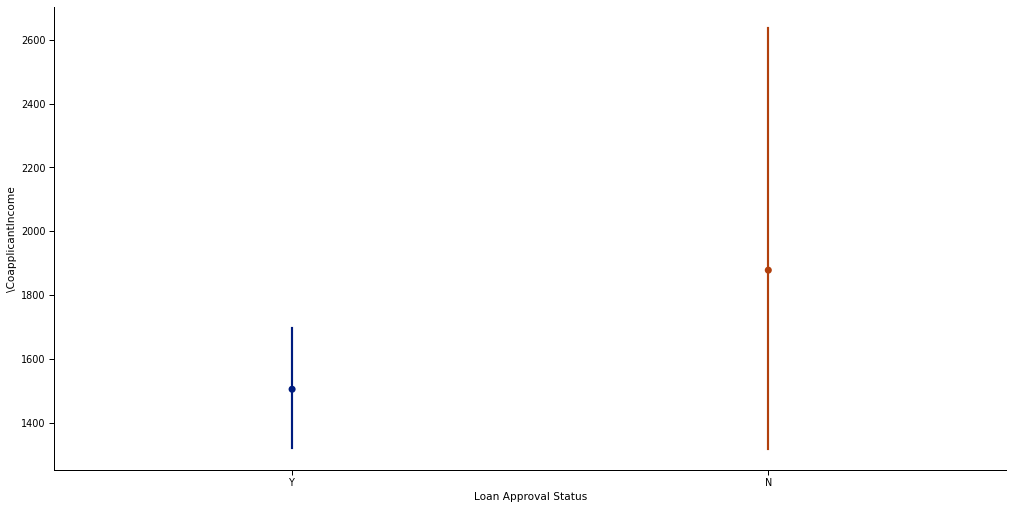

In [240]:
sns.factorplot(y ="CoapplicantIncome", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\CoapplicantIncome")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [241]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="CoapplicantIncome_", color="Loan_Status", title="<b>Loan approval based on Co-Applicant's Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It shows that if applicants income is less then chances of Loan approval are high. But most of the applicants don't have co-ccplicants hence the value is 0 in that case. Hence this finding is not promising.<br>

Let compbine Applicant's and Co-applicant's income and see the the effect of Total income on Loan approval Status

In [242]:
train["Total_income"] = train.ApplicantIncome + train.CoapplicantIncome

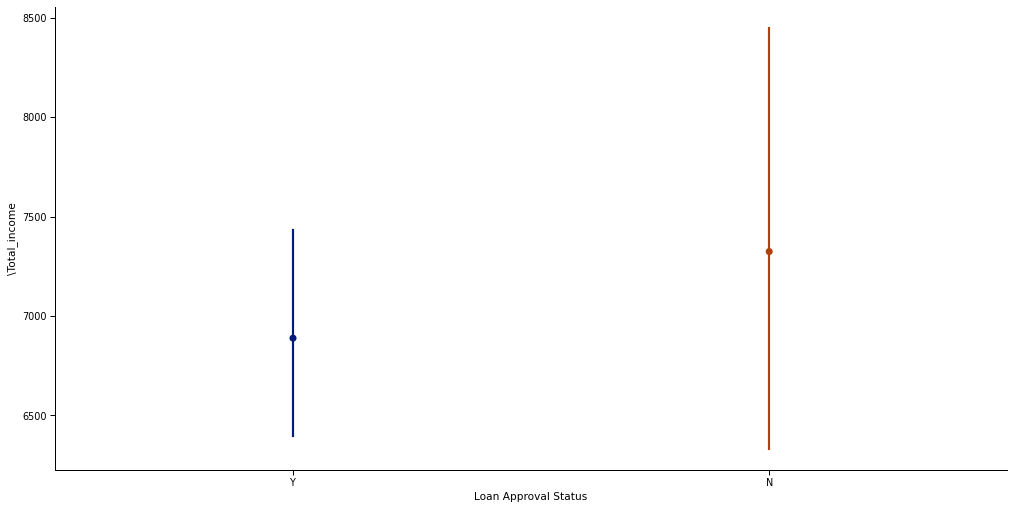

In [243]:
sns.factorplot(y ="Total_income", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\Total_income")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [244]:
train["Total_income_"]= list(map(lambda x: 'Low' if x <= 2500 
         else('Medium' if (x > 2500 and x <= 4000) 
              else('High' if (x > 4000 and x <= 6000) else 'Very High')), train.Total_income))

In [245]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Total_income_", color="Loan_Status", title="<b>Loan approval based on Total Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan Amount

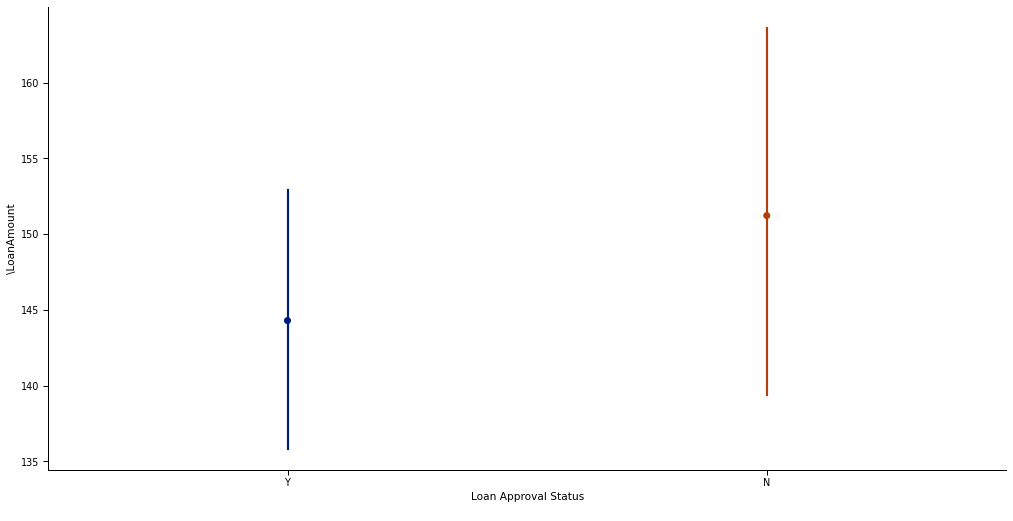

In [246]:
sns.factorplot(y ="LoanAmount", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\LoanAmount")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [247]:


train["LoanAmount_"]= list(map(lambda x: 'Low' if x <= 100 
         else('High' if (x > 100 and x <= 200) 
              else('Very High' if (x > 200) else 'Other')), train.LoanAmount))

In [248]:
# Other for null vals
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="LoanAmount_", color="Loan_Status",  title="<b>Loan approval based on Loan Amount</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [249]:
# let's drop all the created variables
train =train.drop(['ApplicantIncome_', 'CoapplicantIncome_', 'Total_income', 'Total_income_', 'LoanAmount_'], axis = 1)

In [250]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [375]:
train["Dependents"].replace("3+", 3, inplace = True)
test_data["Dependents"].replace("3+", 3, inplace = True)

train["Loan_Status"].replace("N", 0, inplace = True)
train["Loan_Status"].replace("Y", 1, inplace = True)

train['CoapplicantIncome'] = train['CoapplicantIncome'].replace(0, np.nan, inplace=True)
test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].replace(0, np.nan, inplace=True)

KeyError: 'Dependents'

#### Correlation between numerical variables

In [252]:
matrix = train.corr()

<AxesSubplot:>

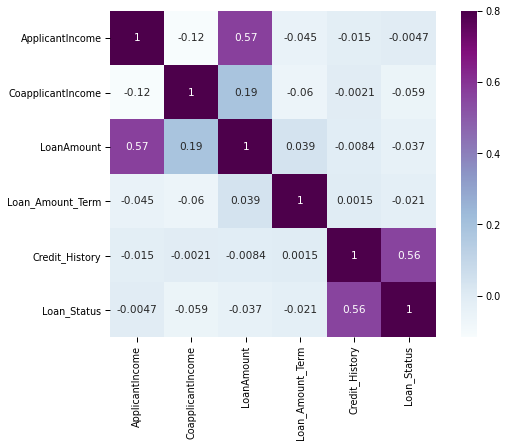

In [253]:
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu", annot = True)

### Missing Value Imputation

In [254]:
missing_values = pd.DataFrame(train.isnull().sum())
missing_values.columns = ["missing_values"]

missing_values_test = pd.DataFrame(test_data.isnull().sum())
missing_values_test.columns = ["missing_values"]

In [255]:
missing_values.sort_values(by = "missing_values", ascending=False)


,missing_values
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [256]:
missing_values_test.sort_values(by = "missing_values", ascending=False)

,missing_values
Credit_History,29
Self_Employed,23
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5
Loan_ID,0
Married,0
Education,0
ApplicantIncome,0


In [257]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)

In [258]:
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0], inplace=True)

In [259]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [260]:
train.Loan_Amount_Term.value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [261]:
test_data.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

value of 360 is repeating most of the times

In [262]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace =True)
test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0], inplace =True)

In [263]:
px.scatter(train, y="LoanAmount")

In [264]:
px.scatter(test_data, y="LoanAmount")

There are some outliers in Loan amounts parameter hence we should impute the null values with median.

In [265]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace =True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].median(), inplace =True)

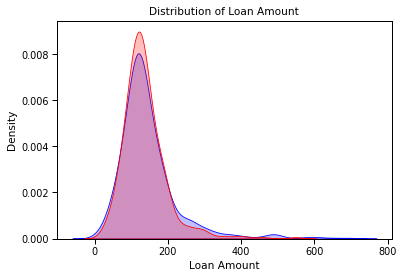

In [266]:
#sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(train["LoanAmount"], color="Blue", shade= True);
ax.set_ylabel('Density');
ax.set_xlabel("Loan Amount");
ax.set_title("Distribution of Loan Amount");


ax = sns.kdeplot(test_data["LoanAmount"], color="red", shade= True);
ax.set_ylabel('Density');
ax.set_xlabel("Loan Amount");
ax.set_title("Distribution of Loan Amount");

Due to the presence of Outliers bulk of data in the Loan amount is at the left and the tail at the right is longer i.e. the data has Right skewness. we can use Log tranformation to remove the skewness of the data, it does not affect the small values much but reduces the larger values.

In [271]:
# Log transformation
train["LoanAmount_log"] = np.log(train["LoanAmount"])
test_data["LoanAmount_log"] = np.log(test_data["LoanAmount"])

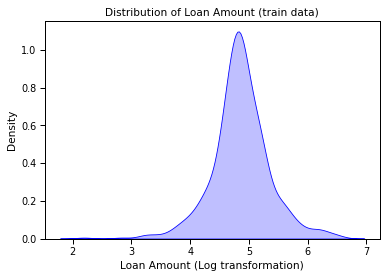

In [272]:
ax = sns.kdeplot(train["LoanAmount_log"], color="Blue", shade= True);
ax.set_ylabel('Density');
ax.set_xlabel("Loan Amount (Log transformation)");
ax.set_title("Distribution of Loan Amount (train data)");


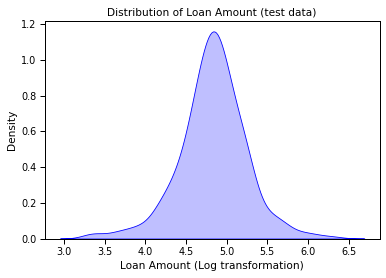

In [273]:
ax = sns.kdeplot(test_data["LoanAmount_log"], color="Blue", shade= True);
ax.set_ylabel('Density');
ax.set_xlabel("Loan Amount (Log transformation)");
ax.set_title("Distribution of Loan Amount (test data)");

In [276]:
# Building the model
train = train.drop(["Loan_ID"], axis = 1)
test_data = test_data.drop(["Loan_ID"], axis = 1)

In [277]:
X = train.drop("Loan_Status", axis =1)
y = train.Loan_Status

In [278]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test_data = pd.get_dummies(test_data)

In [279]:
test_data.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

#### Feature importances


In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [54]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [55]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

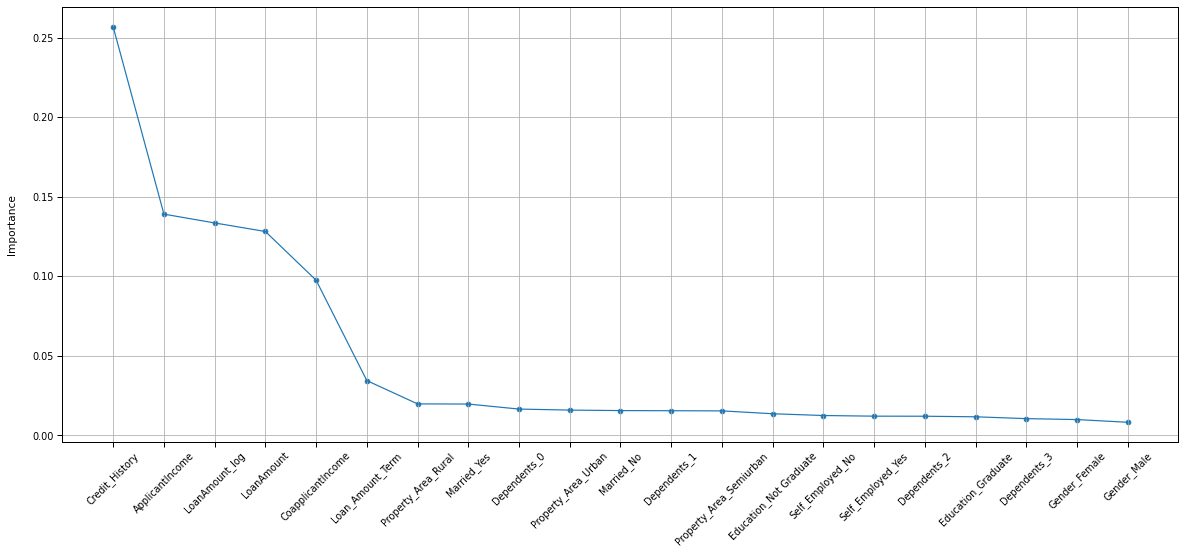

In [56]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['feature_importance']).sort_values('feature_importance',ascending=False)
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.plot(feature_importances)
plt.scatter(y=feature_importances.feature_importance,x=feature_importances.index)
plt.ylabel('Importance\n')
plt.grid()
plt.show()

In [57]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
#models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("XGBoost", XGBClassifier()))

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
names = []
acc_results = []
test_labels = []
roc_auc_results = []
models_fit = []
for name, model in models:
    print(name)
    names.append(name)
    model_ = model.fit(X_train,y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_cv, y_cv)
    acc_results.append(acc)
    
    test_ = model_.predict_proba(np.array(X_cv))
    test_ = test_[:, 1]
    test_labels.append(test_)
    
    roc_auc = roc_auc_score(y_cv, test_, multi_class='ovo', average='weighted')
    roc_auc_results.append(roc_auc)

Logistic Regression
KNN
Gaussian NB
Decision Tree Classifier
Random Forest
Adaboost
Gradient boost classifier
XGBoost
[23:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
list_ = list(zip(names, acc_results, roc_auc_results))
model_results_df = pd.DataFrame(list_,
                  columns = ['Model', 'Accuracy', "ROC_AUC"])

In [60]:
model_results_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy,ROC_AUC
2,Gaussian NB,0.778378,0.725735
4,Random Forest,0.778378,0.784869
7,XGBoost,0.772973,0.793911
5,Adaboost,0.762162,0.752537
6,Gradient boost classifier,0.762162,0.752862
3,Decision Tree Classifier,0.702703,0.678636
0,Logistic Regression,0.697297,0.741088
1,KNN,0.605405,0.526607


In [62]:
fpr_lr, tpr_lr, _ = roc_curve(y_cv, test_labels[0])
fpr_knn, tpr_knn, _ = roc_curve(y_cv, test_labels[1])
fpr_gnb, tpr_gnb, _ = roc_curve(y_cv, test_labels[2])
fpr_dt, tpr_dt, _ = roc_curve(y_cv, test_labels[3])
fpr_rf, tpr_rf, _ = roc_curve(y_cv, test_labels[4])
fpr_ada, tpr_ada, _ = roc_curve(y_cv, test_labels[5])
fpr_gb, tpr_gb, _ = roc_curve(y_cv, test_labels[6])
fpr_xgb, tpr_xgb, _ = roc_curve(y_cv, test_labels[7])

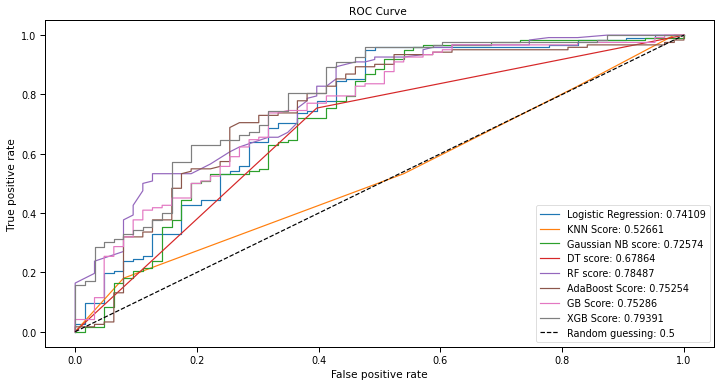

In [63]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression: ' + str(round(roc_auc_results[0], 5)))
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(roc_auc_results[1], 5)))
plt.plot(fpr_gnb, tpr_gnb, label = 'Gaussian NB score: ' + str(round(roc_auc_results[2], 5)))
plt.plot(fpr_dt, tpr_dt, label = 'DT score: ' + str(round(roc_auc_results[3], 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(roc_auc_results[4], 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(roc_auc_results[5], 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(roc_auc_results[6], 5)))
plt.plot(fpr_xgb, tpr_xgb, label = 'XGB Score: ' + str(round(roc_auc_results[7], 5)))

plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

### Optimization 

In [72]:
## Cross Validation Scores

# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def CrossValidationDict(models_list, scr, X_train = X, y_cv = y, cv = 5):
    cvDict = {}
    for mo in models_list:
        cvScore = cross_val_score(mo, X_train, y_cv, cv = cv, scoring = scr)
        
        cvDict[str(mo).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [73]:
CrossValidationDict(models_fit, scr = 'roc_auc')

[23:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'LogisticRegression': [0.7613108752272838, 0.0572604451135635],
 'KNeighborsClassifier': [0.5091802186461629, 0.025701960476993368],
 'GaussianNB': [0.7545628021789013, 0.025945127116381292],
 'DecisionTreeClassifier': [0.6466124020458385, 0.031276977676230555],
 'RandomForestClassifier': [0.759339761545644, 0.03629165276048184],
 'AdaBoostClassifier': [0.7278719044972914, 0.04367138332205218],
 'GradientBoostingClassifier': [0.7357179335971906, 0.04536974947781717],
 'XGBClassifier': [0.7614087443344408, 0.025850559057545144]}

In [74]:
CrossValidationDict(models_fit, scr = 'accuracy')

[23:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'LogisticRegression': [0.7377049180327868, 0.04056751358116207],
 'KNeighborsClassifier': [0.6140077302412368, 0.016665887272068795],
 'GaussianNB': [0.783406637345062, 0.023724757270509555],
 'DecisionTreeClassifier': [0.693815807010529, 0.01954930344811238],
 'RandomForestClassifier': [0.7882980141276823, 0.019662051295215595],
 'AdaBoostClassifier': [0.7866186858589896, 0.02231507202012775],
 'GradientBoostingClassifier': [0.7720111955217913, 0.030242126729569573],
 'XGBClassifier': [0.7589497534319605, 0.01834053196492521]}

### Hyper Parameter Tuning

#### ADABOOST

In [109]:

ABC = AdaBoostClassifier()

ABC_param_grid = {"algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :list(range(100, 700, 10)),
                  "learning_rate":  [0.001, 0.01, 0.1, 0.11,0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose =3)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_

gsABC.best_score_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   47.9s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 2036 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed: 12.4min finished


0.8228454172366619

In [110]:
gsABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=540)

In [129]:
gsABC.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 540}

### GradientBoost

In [121]:
# Gradient Boost

GBM = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
                 'n_estimators' : list(range(100,700,100)),
                 'learning_rate': [0.01,0.1,0.11],
                 'max_depth': [2,3,4,5,6,7,8,9,10],
                 'min_samples_leaf': [30,40],
                 'max_features': [0.6,0.7,0.8]}

gsGBC = GridSearchCV(GBM, param_grid = gb_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsGBC.fit(X_train,y_train)

gbm_best = gsGBC.best_estimator_

gsGBC.best_score_


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   38.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 4860 out of 4860 | elapsed:  7.9min finished


0.8205198358413133

In [124]:
# XGBOOSt
XGB = XGBClassifier()

xgb_param_grid = {'learning_rate': [0.01,0.1,0.11], 
                  'max_depth': [4,5,6,7],
                  'n_estimators': [50,100,200,400,500,550], 
                  'gamma': [0,1,5,8],
                  'subsample': [0.8,0.95,1.0]}

gsXBC = GridSearchCV(XGB, param_grid = xgb_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsXBC.fit(X_train,y_train)

xgb_best = gsXBC.best_estimator_

gsXBC.best_score_


Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  9.1min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 11.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 14.2min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 17.3min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 21.0min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 24.7min
[Parallel(n_jobs=6)]: Done 8640 out of 8640 | elapsed: 25.5min finished


[03:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8205426356589147

In [367]:
# Logistic Regression

grid={"C":np.logspace(-10,15,200), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=1)
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = "accuracy", n_jobs =6,verbose = 1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2420 tasks      | elapsed:    8.1s


tuned hpyerparameters :(best parameters)  {'C': 0.19791668678535493, 'penalty': 'l2'}
accuracy : 0.8159468438538205


[Parallel(n_jobs=6)]: Done 4000 out of 4000 | elapsed:   15.5s finished


In [147]:
#Random Forest

rf_test = {"max_depth": [3,4,5,7,10,0,24,25],
           "max_features": [6,8,10],
           "min_samples_split": [3,4],
           "min_samples_leaf": [3,4],
           "bootstrap": [True],
           "n_estimators" :[50,80,100,300,500,600],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning = GridSearchCV(RandomForestClassifier(), param_grid = rf_test, scoring = 'accuracy', n_jobs = 6, cv = 5)

tuning.fit(X_train,np.ravel(y_train))

rf_best = tuning.best_estimator_

tuning.best_score_


0.8228454172366619

In [145]:
#Decision tree classifier


tree_param = {'criterion': ['entropy', 'gini'], 
               'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15] }
              
gsDTC = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_param, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsDTC.fit(X_train,y_train)

dtc_best = gsDTC.best_estimator_

gsDTC.best_score_


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  93 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 129 out of 140 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 140 out of 140 | elapsed:    0.2s finished


0.8205198358413132

In [136]:
#GaussianNB


gnb_clf = GaussianNB()
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(gnb_clf, parameters, cv=5, verbose=1, n_jobs=6, scoring = "accuracy")
clf.fit(X_train, y_train)
#plot_grid_search(clf)
#table_grid_search(clf)
clf_best = clf.best_estimator_

clf.best_score_


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  70 out of  70 | elapsed:    0.1s finished


0.811217510259918

In [329]:
#knn

param_grid_knn = {"n_neighbors": list(range(1,200))}

gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=1, n_jobs=6, scoring = "accuracy")
gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_

gs_knn.best_score_


Fitting 5 folds for each of 199 candidates, totalling 995 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 995 out of 995 | elapsed:    7.0s finished


0.6993160054719563

In [330]:
gs_knn.best_params_

{'n_neighbors': 29}

In [332]:
#Extratrees
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [3, 4, 5],
                 "max_features": [3, 10, 15],
                 "min_samples_split": [2, 3, 4],
                 "min_samples_leaf": [1, 2],
                 "bootstrap": [False,True],
                 "n_estimators" :[100,200,300],
                 "criterion": ["gini","entropy"]}

gsExtC = GridSearchCV(ExtC, param_grid = ex_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsExtC.fit(X_train,y_train)

ext_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   34.6s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 3240 out of 3240 | elapsed:  4.6min finished


0.8228454172366619

## Voting Classifier

In [368]:
voting = VotingClassifier(estimators=[('abc', gsABC.best_estimator_), 
                                      ('lr',logreg_cv.best_estimator_),
                                      ('xgb',gsXBC.best_estimator_),
                                      ('gbc',gsGBC.best_estimator_),
                                     ("ext",ext_best)])

v_param_grid = {'voting':['soft']} # tuning voting parameter

gsV = GridSearchCV(voting, 
                   param_grid = v_param_grid, cv = 5, 
                   scoring = "accuracy",
                   n_jobs = 6, 
                   verbose = 1)

gsV.fit(X_train,y_train)

v_best = gsV.best_estimator_

gsV.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.4s finished


[21:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8228454172366619

In [369]:
models_tuned = [gsABC.best_estimator_, gs_knn.best_estimator_, clf.best_estimator_, gsDTC.best_estimator_, 
                tuning.best_estimator_, logreg_cv.best_estimator_, gsXBC.best_estimator_, gsGBC.best_estimator_,ext_best, v_best]
model_names= ["Adaboost", "KNN", "GaussianNB", "Decision Trees", "Random Forest", "Logistic Regression", 
              "XGBoost", "GradientBoost","ExtraTrees", "Voting_classifier"]


names = []
acc_results = []
test_labels = []
roc_auc_results = []
models_fit = []

for name, model in zip(model_names,models_tuned):
    print(name)
    names.append(name)
    model_ = model.fit(X_train,y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_cv, y_cv)
    acc_results.append(acc)
    
    test_ = model_.predict_proba(np.array(X_cv))
    test_ = test_[:, 1]
    test_labels.append(test_)
    
    roc_auc = roc_auc_score(y_cv, test_, multi_class='ovo', average='weighted')
    roc_auc_results.append(roc_auc)

Adaboost
KNN
GaussianNB
Decision Trees
Random Forest
Logistic Regression
XGBoost
[21:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GradientBoost
ExtraTrees
Voting_classifier
[21:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [370]:
list_tuned = list(zip(names, acc_results, roc_auc_results))
model_tuned_df = pd.DataFrame(list_tuned,
                  columns = ['Model', 'Accuracy', "ROC_AUC"])

In [371]:
model_tuned_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy,ROC_AUC
0,Adaboost,0.783784,0.720336
3,Decision Trees,0.783784,0.706154
4,Random Forest,0.783784,0.749675
5,Logistic Regression,0.783784,0.760994
6,XGBoost,0.783784,0.730744
8,ExtraTrees,0.783784,0.736794
9,Voting_classifier,0.783784,0.749545
7,GradientBoost,0.778378,0.749154
2,GaussianNB,0.772973,0.718449
1,KNN,0.659459,0.551848


In [372]:
def predict_results(classifier, output_fileName):
    predict_results = classifier.predict(test_data)
    submission = pd.read_csv("sample_submission.csv")
    submission["Loan_Status"] = predict_results
    submission["Loan_ID"] = test_data_["Loan_ID"]
    submission["Loan_Status"].replace(0, "N", inplace = True)
    submission["Loan_Status"].replace(1, "Y", inplace = True)
    pd.DataFrame(submission, columns=["Loan_ID", "Loan_Status"]).to_csv(output_fileName)

In [320]:
# Adaboost classifier results
predict_results(gsABC.best_estimator_, "Adaboost_output.csv")

In [309]:
# Gradientboosting classifier result
predict_results(gsGBC.best_estimator_, "GradientBoosting_output.csv")

In [310]:
# XGBOOST classifier result
predict_results( gsXBC.best_estimator_, "XGBoost_output.csv")

In [374]:
# Logistic Regression result
predict_results(logreg_cv.best_estimator_, "LogisticRegression_output.csv")

In [312]:
# Random Forest result
predict_results(tuning.best_estimator_, "RandomForest_output.csv")

In [313]:
# GaussianNB Classifier result
predict_results(clf.best_estimator_, "GNB_output.csv")


In [315]:
# Voting classifier
predict_results(v_best, "voting_classifier.csv")


In [331]:
predict_results(knn_best, "KNN.csv")

In [337]:
predict_results(ext_best, "extratrees.csv")